In [1]:
from cProfile import label

import numpy as np
import matplotlib.pyplot as plt

In [28]:
# create a line plot with the mid_prices as the x-axis and labels as the y-axis


# assert len(labels) == len(mid_prices), "Labels and mid_prices must have the same length."

Array shape: (863997,), dtype: float32


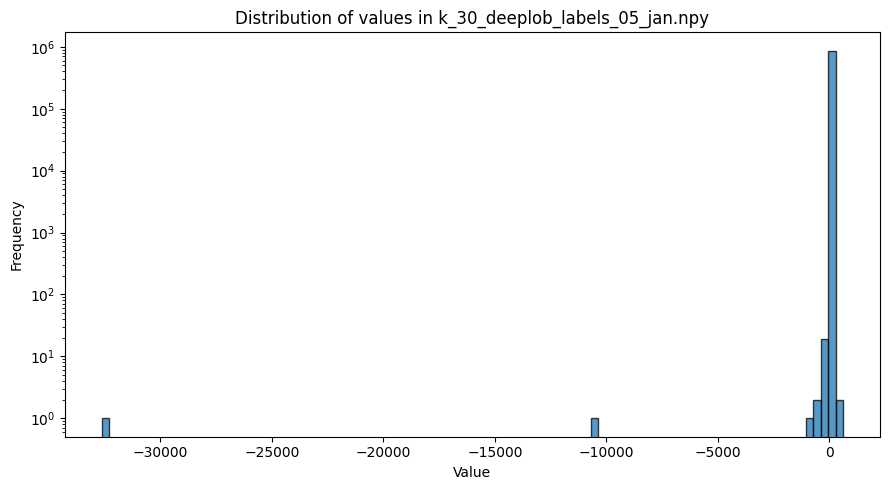

In [6]:
# import numpy as np
# 
# # === 1. Load the data ===
# # Put the .npy file in the same directory or give an absolute/relative path.
# 
# print(f"Array shape: {labels_file.shape}, dtype: {labels_file.dtype}")
# 
# # === 2. Plot the distribution ===
# plt.figure(figsize=(9, 5))
# 
# # Histogram: tweak `bins=` for more/less resolution
# plt.hist(labels_file, bins=100, edgecolor="black", alpha=0.75)
# 
# plt.title("Distribution of values in k_30_deeplob_labels_05_jan.npy")
# plt.xlabel("Value")
# plt.ylabel("Frequency")
# 
# # If the counts span several orders of magnitude, uncomment for log-scale:
# # plt.yscale("log")
# plt.yscale("log")
# plt.tight_layout()
# plt.show()


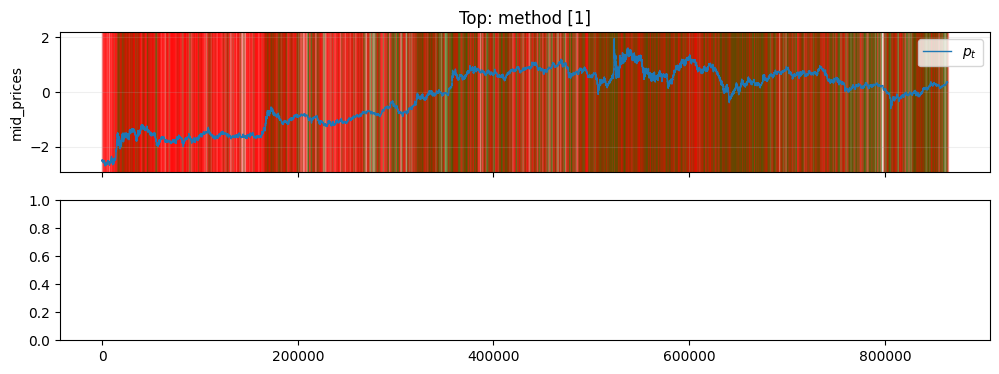

In [61]:
day = 2
k = 50
labels_file = np.load(f"../../data/features/normalized_y_labels/k_{k}_deeplob_labels_{day:02d}_jan.npy")
mid_prices = np.load(f"../../data/features/mid_prices/mid_prices_{day:02d}_jan.npy")
fig, axes = plt.subplots(2, 1, figsize=(12, 4), sharex=True)

mids = mid_prices

threshold = 0.001
cat_labels = [ 1 if label > threshold else (-1 if label < -20.0 * threshold else 0) for label in labels_file]

np.save(f"../../data/features/directional_labels/k_{k}_deeplob_cat_labels_{day:02d}_jan.npy", cat_labels)
    
# ──── TOP PANEL ────
ax = axes[0]
ax.plot(mids, color="tab:blue", linewidth=1, label=r"$p_t$")
start = 0
curr  = cat_labels[0]
for i in range(1, len(cat_labels)):
    if cat_labels[i] != curr:
        if curr == 1:
            ax.axvspan(start, i, color="green", alpha=.25)
        elif curr == -1:
            ax.axvspan(start, i, color="red",   alpha=.25)
        start, curr = i, cat_labels[i]
# draw final block
if curr == 1:
    ax.axvspan(start, len(cat_labels), color="green", alpha=.25)
elif curr == -1:
    ax.axvspan(start, len(cat_labels), color="red",   alpha=.25)
    
    ax.set_title("Top: method [1]")
ax.set_ylabel("mid_prices")
ax.legend(loc="upper right")
ax.grid(alpha=.2)

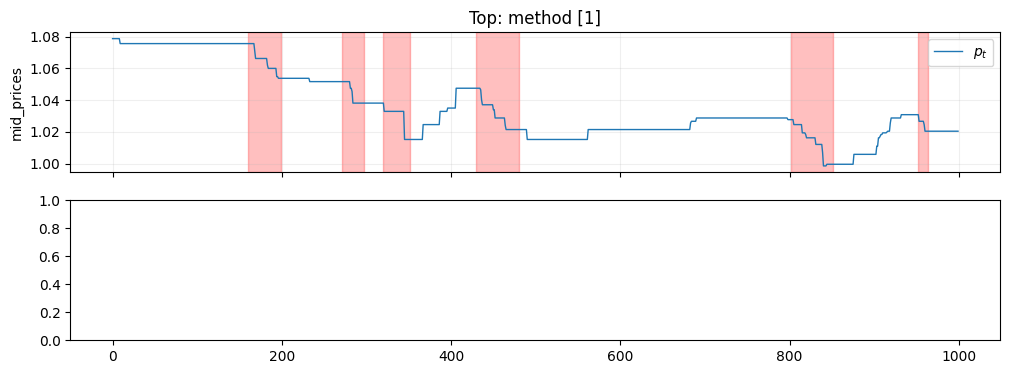

In [11]:
threshold = 0.04

labels_cat = [1 if label > threshold else (-1 if label < -1.0 * threshold else 0) for label in labels_file]

# np.save("../../data/features/directional_labels/k_50_deeplob_cat_labels_01_jan.npy", labels)
mids = mid_prices[1000:2000]
labels = labels_cat[1000:2000]

fig, axes = plt.subplots(2, 1, figsize=(12, 4), sharex=True)


# ──── TOP PANEL ────
ax = axes[0]
ax.plot(mids, color="tab:blue", linewidth=1, label=r"$p_t$")

start = 0
curr  = labels[0]
for i in range(1, len(labels)):
    if labels[i] != curr:
        if curr == 1:
            ax.axvspan(start, i, color="green", alpha=.25)
        elif curr == -1:
            ax.axvspan(start, i, color="red",   alpha=.25)
        start, curr = i, labels[i]
# draw final block
if curr == 1:
    ax.axvspan(start, len(labels), color="green", alpha=.25)
elif curr == -1:
    ax.axvspan(start, len(labels), color="red",   alpha=.25)
# else:
#     ax.axvspan(start, len(labels), color="gray",  alpha=.25)

ax.set_title("Top: method [1]")
ax.set_ylabel("mid_prices")
ax.legend(loc="upper right")
ax.grid(alpha=.2)

# plt.plot(mid_prices[0:2000], color="tab:blue", linewidth=1, label=r"$p_t$")
# plt.plot(labels[0:2000], color="tab:orange", linewidth=1, label=r"$\hat{y}_t$")